# A review of important concepts in numerical optimization

## **1. One Dimensional Case**

$$f(x) = x^3 - 2x + 2$$

**1.**

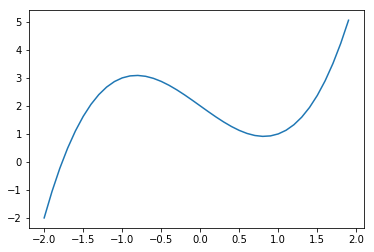

In [4]:
# This is general
import matplotlib.pyplot as plt
import numpy as np

#1
# _Function to plot
X = np.arange(-2, 2, 0.1)
Y = (X**3) - 2*X + 2

# Plot 
line = plt.plot(X, Y)
plt.show()


#### **2.**

$$f'(x) = 3x^2 - 2$$
$$f'(x) = 0 -> x = \pm\sqrt{\frac{2}{3}} = \pm 0.816$$
   
   Geometrically it is congruent with the previous plot

#### **3.**

$$f''(x) = 6x$$

In [5]:
def f_second_prime(X):
    f_2 = 6*X
    return f_2

f_second_prime(np.sqrt(2/3))
f_second_prime(-np.sqrt(2/3))

-4.898979485566356

The second prime at $\sqrt(\frac{2}{3})$ is $4.89$, so there is a minimum at this point.
<br>The second prime at $-\sqrt(\frac{2}{3})$ is $-4.89$, so there is a maximum at this point.

## **2. Two Dimensional Case**

$$f(x) = x_1^2 + x_2^2$$

#### **1.**

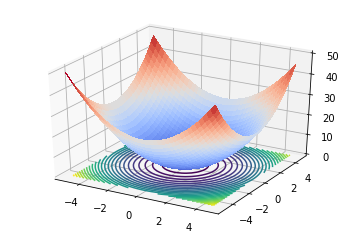

In [6]:
# This is general
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Surface to plot
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y) #converts X and Y into matrices to plot

Z = X**2 + Y**2

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.contour(X,Y,Z,30,zdir='z',offset=0)

plt.show()


In [7]:
Z[20,20]

0.0

#### **2.**

In [8]:
# gradient = [dx dy]

first_grad = np.gradient(Z)

Z_dx = first_grad[0]

Z_dy = first_grad[1]

print('Gradient component of dimension X:\n\n',Z_dx)

print('\nGradient component of dimension Y:\n\n',Z_dy)



Gradient component of dimension X:

 [[-2.4375 -2.4375 -2.4375 ... -2.4375 -2.4375 -2.4375]
 [-2.375  -2.375  -2.375  ... -2.375  -2.375  -2.375 ]
 [-2.25   -2.25   -2.25   ... -2.25   -2.25   -2.25  ]
 ...
 [ 2.125   2.125   2.125  ...  2.125   2.125   2.125 ]
 [ 2.25    2.25    2.25   ...  2.25    2.25    2.25  ]
 [ 2.3125  2.3125  2.3125 ...  2.3125  2.3125  2.3125]]

Gradient component of dimension Y:

 [[-2.4375 -2.375  -2.25   ...  2.125   2.25    2.3125]
 [-2.4375 -2.375  -2.25   ...  2.125   2.25    2.3125]
 [-2.4375 -2.375  -2.25   ...  2.125   2.25    2.3125]
 ...
 [-2.4375 -2.375  -2.25   ...  2.125   2.25    2.3125]
 [-2.4375 -2.375  -2.25   ...  2.125   2.25    2.3125]
 [-2.4375 -2.375  -2.25   ...  2.125   2.25    2.3125]]


$$ \nabla f(x) = \left\lgroup\matrix{2x_1\cr 2x_2}\right\rgroup$$
<br>
$$ x = \left\lgroup\matrix{0\cr 0}\right\rgroup$$

In [9]:
#The minimum x* is located in the position (20,20) of the array Z
print(Z_dx[20][0])
print(Z_dy[0][20])

0.0
0.0


#### **3.**

Hessian matrix at $x^*$ $$\nabla^2 f(x^*) = \left\lgroup \matrix{2&0\cr0&2} \right\rgroup$$

In [10]:
#Hessian matrix

Z_dxdx = np.gradient(Z_dx)[0]
Z_dxdy = np.gradient(Z_dx)[1]

Z_dydx = np.gradient(Z_dy)[0]
Z_dydy = np.gradient(Z_dy)[1]

In [11]:
H = np.zeros([2,2])
H[0,0] = 2
H[0,1] = 0
H[1,0] = 0
H[1,1] = 2
print(H)

np.linalg.eigvals(H)

[[2. 0.]
 [0. 2.]]


array([2., 2.])

All eigenvalues are strictly positive, so we can conclude that in $x^*$ there is a minimum

#### **4.**

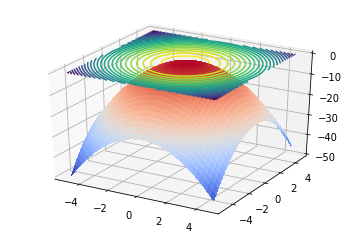

In [12]:

# Surface to plot
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y) #converts X and Y into matrices to plot

FA = -X**2 - Y**2

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, FA, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.contour(X,Y,FA,30,zdir='z',offset=0)

plt.show()

In [99]:
FA_dx = np.gradient(FA)[0]
FA_dy = np.gradient(FA)[1]

print(np.where(FA_dx[:,0] == 0.0))
print(np.where(FA_dy[0,:] == 0.0))

HA = np.zeros([2,2])
HA[0,0] = -2
HA[1,0] = 0
HA[0,1] = 0
HA[1,1] = -2
print(HA)

np.linalg.eigvals(HA)

(array([20], dtype=int64),)
(array([20], dtype=int64),)
[[-2.  0.]
 [ 0. -2.]]


array([-2., -2.])

At the point where the gradient is zero, the Hessian matrix indicates which kind of extrema point is. If the eigenvalues of the Hessian are strictly positive, it is a minimum. If the eigenvalues of the Hessian are strictly negative, it is a maximum. In this case the extrema point is a maximum because its eigenvalues are strictly negatives.

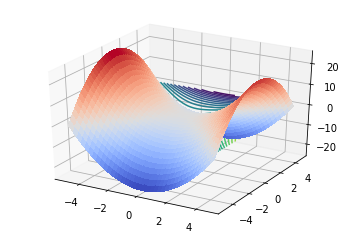

In [102]:
# Surface to plot
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y) #converts X and Y into matrices to plot

FB = X**2 - Y**2

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, FB, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.contour(X,Y,FB,30,zdir='z',offset=0)

plt.show()

In [104]:
FB_dx = np.gradient(FB)[0]
FB_dy = np.gradient(FB)[1]

print(np.where(FB_dx[:,0] == 0.0))
print(np.where(FB_dy[0,:] == 0.0))

HB = np.zeros([2,2])
HB[0,0] = 2
HB[1,0] = 0
HB[0,1] = 0
HB[1,1] = -2
print(HB)

np.linalg.eigvals(HB)

(array([20], dtype=int64),)
(array([20], dtype=int64),)
[[ 2.  0.]
 [ 0. -2.]]


array([ 2., -2.])

What happens when an eigenvalue is positive and the other negative. Here we have a saddle point. The function is increasing in one dimension and decreasing in the other.

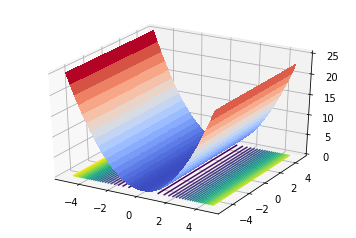

In [103]:
# Surface to plot
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y) #converts X and Y into matrices to plot

FC = X**2

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y,FC, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.contour(X,Y,FC,30,zdir='z',offset=0)

plt.show()

In [105]:
FC_dx = np.gradient(FC)[0]
FC_dy = np.gradient(FC)[1]

print(np.where(FC_dx[:,0] == 0.0))
print(np.where(FC_dy[0,:] == 0.0))

HC = np.zeros([2,2])
HC[0,0] = 2
HC[1,0] = 0
HC[0,1] = 0
HC[1,1] = 0
print(HC)

np.linalg.eigvals(HC)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64),)
(array([20], dtype=int64),)
[[2. 0.]
 [0. 0.]]


array([2., 0.])

In this last case, the function is decreasing in one direction but in the other it is static. That is why an eigenvalue is zero. Due this fact the point $x^*$ could not be a minimum.

# **3. The exercise**

#### You are proposed to study the function that has been given in the lectures<br><br> $$f(x_1,x_2) = x_1^2(4-2.1x_1^2+\frac{1}{3}x_1^4)+x_1x_2+x_2^2(-4+4x_2^2)$$Follow these steps:<br><br> 1. Plot the previous function within the range $x_1 \in [-2; 2]$ and $x_2 \in [-1; 1]$ using, for instance,a step of e.g. 0:1. Be sure that the plot is correct: just look at the plot of the lectures and compare them with the result you obtain. Observe where the minimum (and maximum) may be.

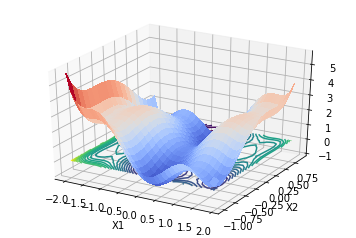

In [4]:
#1
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

X1 = np.arange(-2, 2, 0.1)
X2 = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1, X2) #converts X and Y into matrices to plot

F = (X1**2)*(4-2.1*X1**2+(1/3)*X1**4)+X1*X2+(X2**2)*(-4+4*X2**2)

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, F, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.contour(X1,X2,F,30,zdir='z',offset=0)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()

In the previous plot we can see intuitively that may exist a minimum along the line defined where $x_1$ is near zero. Regarding to maximums, it seems that they appear in the borders of the observed $x_1,x_2$ range. There may be one where $x_1$ is near $-2$  and $x_2$ near $-1$, and another where $x_1$ is close to $2$ and $x_2$ is approximating $1$.

#### **2. Analytically compute the gradient $\nabla f(x)$.**

$$
\nabla f(x) = \left\lgroup \matrix{2x_1^5 - 8.4x_1^3 + 8x_1 + x_2\cr 16x_2^3 - 8x_2 + x_1} \right\rgroup
$$

#### **3. Numerically compute an approximation of the points $x^*$ at which $\nabla f(x^*) = 0$. For thath issue: <br><br>(a) Evaluate $\Vert\nabla f(x)\Vert^2$ at the previous range using a step of e.g. 0:005 or smaller if you prefer (but not too small!).<br><br>(b) Using brute force, search for those points $\hat x$ within the previous range at which the value of $\Vert\nabla f(x)\Vert^2$ is strictly smaller than the value of its neighbors. Our purpose here is to find those points at which the gradient is small: this is the principle of the gradient descent algorithms, which will be analyzed in later laboratories.<br><br>(c) Which are the values of $\hat x$ you have obtained? Which is the value of $\Vert\nabla f(x)\Vert^2$ at those points?**

In [131]:
X1 = np.arange(-2, 2, 0.005)
X2 = np.arange(-1, 1, 0.005)
X1, X2 = np.meshgrid(X1, X2)

x_values = []
first_x = True

m_norm_grad_F_2 = np.zeros((X1.shape[0],X1.shape[1]))
x_hat_values = np.zeros([1,2])
norm_grad_F_2_values = []

#calculate the squared norm of gradient F
for j in range(0,m_norm_grad_F_2.shape[1]):
    for i in range(0,m_norm_grad_F_2.shape[0]):
        F_dx = 2*(X1[i,j]**5)-8.4*(X1[i,j]**3)+8*X1[i,j]+X2[i,j]
        F_dy = 16*X2[i,j]**3-8*X2[i,j]+X1[i,j]
        grad_F = [F_dx,F_dy]
        norm_grad_F = np.linalg.norm(grad_F)
        norm_grad_F_2 = norm_grad_F**2
        m_norm_grad_F_2[i,j] = norm_grad_F_2

#find the points at which the gradient is smaller than its neighbours
#the points at the border of the grid are ignored
for k in range(1,m_norm_grad_F_2.shape[1]-1):
    for t in range(1,m_norm_grad_F_2.shape[0]-1):
        
        if(m_norm_grad_F_2[t,k]<m_norm_grad_F_2[t-1,k-1]):
            if(m_norm_grad_F_2[t,k]<m_norm_grad_F_2[t-1,k]):
                if(m_norm_grad_F_2[t,k]<m_norm_grad_F_2[t-1,k+1]):
                    if(m_norm_grad_F_2[t,k]<m_norm_grad_F_2[t,k-1]):
                        if(m_norm_grad_F_2[t,k]<m_norm_grad_F_2[t,k+1]):
                            if(m_norm_grad_F_2[t,k]<m_norm_grad_F_2[t+1,k-1]):
                                if(m_norm_grad_F_2[t,k]<m_norm_grad_F_2[t+1,k]):
                                    if(m_norm_grad_F_2[t,k]<m_norm_grad_F_2[t+1,k+1]):
                                        
                                        x_hat = [X1[t,k],X2[t,k]]
                                        if first_x == True:
                                            x_values = [x_hat]
                                            first_x = False
                                        else:
                                            x_values = np.append(x_values,x_hat)
                                            
                                        norm_grad_F_2_values = np.append(norm_grad_F_2_values,m_norm_grad_F_2[t,k])
                                        print('\nPoint:\n',x_hat)
                                        print('Value of squared norm of grad F at the previous point:\n',m_norm_grad_F_2[t,k])

x_values = x_values.reshape(int(x_values.shape[0]/2),2)
norm_grad_F_2_values = norm_grad_F_2_values.reshape(norm_grad_F_2_values.shape[0],1)
                                        


Point:
 [-1.7050000000000063, 0.7950000000000017]
Value of squared norm of grad F at the previous point:
 0.0014301678960873352

Point:
 [-1.6400000000000077, -0.22999999999999932]
Value of squared norm of grad F at the previous point:
 0.0006745825305698908

Point:
 [-1.6050000000000084, -0.5699999999999996]
Value of squared norm of grad F at the previous point:
 0.00041565349409284556

Point:
 [-1.295000000000015, -0.6049999999999996]
Value of squared norm of grad F at the previous point:
 4.5405036332579384e-05

Point:
 [-1.2300000000000164, -0.15999999999999925]
Value of squared norm of grad F at the previous point:
 0.00024181811612573458

Point:
 [-1.110000000000019, 0.7700000000000016]
Value of squared norm of grad F at the previous point:
 0.0012559284739378032

Point:
 [-0.09000000000004071, 0.7150000000000016]
Value of squared norm of grad F at the previous point:
 0.0014768714734470524

Point:
 [-4.263256414560601e-14, 8.881784197001252e-16]
Value of squared norm of grad F 

Once the code above this paragraph is executed, all the points whose $\Vert\nabla f(x)\Vert^2$ is strictly smaller than the value of their neighbors are listed with their corresponding values of $\Vert\nabla f(x)\Vert^2$.

#### **4. Analytically compute the Hessian of $f(x1, x2)$ and evaluate it at the values $\hat x$ you have found. What kind of information is giving you the Hessian? Does it correspond to a minimum? To a maximum? Or may be a saddle point? You may use the eigvals function of Python to compute the eigenvalues of the Hessian matrix (i.e. there is no need to compute them analytically).**

$$
\nabla^2 f(x) = \left\lgroup \matrix{10x_1^4 - 25.2x_1^2 + 8& 1\cr 1&48x_2^2 - 8} \right\rgroup
$$

In [145]:

for i in range(0,x_values.shape[0]):
    Hessian_dx1dx1 = 10*(x_values[i,0]**4)-25.2*(x_values[i,0]**2)+8
    Hessian_dx1dx2 = 1
    Hessian_dx2dx1 = 1
    Hessian_dx2dx2 = 48*(x_values[i,1]**2)-8
    
    Hessian = [[Hessian_dx1dx1,Hessian_dx1dx2],[Hessian_dx2dx1,Hessian_dx2dx2]]
    
    eigvals = np.linalg.eigvals(Hessian)
    
    if(eigvals[0]>0 and eigvals[1]>0):
        print('\nEigenvalues at ',x_values[i],' are strictly positive: ',eigvals)
        print('So, there is a minimum at ',x_values[i])
    elif(eigvals[0]<0 and eigvals[1]<0):
        print('\nEigenvalues at ',x_values[i],' are strictly negative: ',eigvals)
        print('So, there is a maximum at ',x_values[i])
    elif((eigvals[0]<0 and eigvals[1]>0) or (eigvals[0]>0 and eigvals[1]<0)):
        print('\nAt ',x_values[i],' there are an eigenvalue positive and other negative: ',eigvals)
        print('So, there is a saddle point at ',x_values[i])


Eigenvalues at  [-1.705  0.795]  are strictly positive:  [18.95522803 22.63288548]
So, there is a minimum at  [-1.705  0.795]

At  [-1.64 -0.23]  there are an eigenvalue positive and other negative:  [12.61687844 -5.51611684]
So, there is a saddle point at  [-1.64 -0.23]

Eigenvalues at  [-1.605 -0.57 ]  are strictly positive:  [9.88074954 7.15766846]
So, there is a minimum at  [-1.605 -0.57 ]

At  [-1.295 -0.605]  there are an eigenvalue positive and other negative:  [-6.20031498  9.63261349]
So, there is a saddle point at  [-1.295 -0.605]

Eigenvalues at  [-1.23 -0.16]  are strictly negative:  [-8.03050482 -5.97711108]
So, there is a maximum at  [-1.23 -0.16]

At  [-1.11  0.77]  there are an eigenvalue positive and other negative:  [-7.90347351 20.49445761]
So, there is a saddle point at  [-1.11  0.77]

Eigenvalues at  [-0.09   0.715]  are strictly positive:  [ 7.683608  16.6517281]
So, there is a minimum at  [-0.09   0.715]

At  [-4.26325641e-14  8.88178420e-16]  there are an eigen

The Hessian matrix at the points $\hat x$ tells us which kind of extrema point is $\hat x$. As we have seen in the previous practical exercise 2, if a perturbation $d \in R^2$ exists around our point $\hat x$, the function $f(x)$ around this point could be written as follows:<br>
$$f(\hat x + d) = f(\hat x) + d^T\nabla f(\hat x) + \frac{1}{2}d^T\nabla^2 f(\hat x)d$$

Knowing that $\hat x$  is an extrema point, $\nabla f(\hat x) = 0$. Then the previous expression could be written like this:
$$f(\hat x + d) = f(\hat x) + \frac{1}{2}d^T\nabla^2 f(\hat x) d$$
<br>
Now, imagine that $d$ is an eigenvector of the Hessian matrix $\nabla^2 f(\hat x)$. By definition we know that when an eigenvector is applied to a transformation the result is a scalar multiple of the eigenvector. 
<br><br>So, in our case: $$\nabla^2 f(\hat x)d = \lambda d$$ where the constant value $\lambda$ is the eigenvalue of the Hessian matrix.
<br><br>If we substitute it in the expression $f(\hat x + d)$:$$f(\hat x + d) = f(\hat x) + \frac{1}{2}d^T\lambda d $$
<br>And finally, $$f(\hat x + d) = f(\hat x) + \frac{\lambda}{2}\Vert d \Vert ^2$$where $\Vert d\Vert^2$ is the squared norm of $d$, which is always positive.
<br><br>If $\hat x$ is a minimum, its $f(\hat x)$ value should be minimum
<br>$$f(\hat x) < f(\hat x + d)$$
<br>To accomplish this statement $\frac{\lambda}{2}\Vert d \Vert^2$ should be positive, and due the fact that the squared norm is always positive, the eigenvalue $\lambda$ should be strictly positive. 
<br><br>In conclusion, to ensure that there is a minimum at $\hat x$ the eigenvalues of the Hessian matrix at this point should be strictly positives.
<br><br>In case that there was a maximum at $\hat x$, its $f(\hat x)$ value should be maximum
<br><br>$$f(\hat x) > f(\hat x + d)$$
<br>So, to accomplish this inequality the eigenvalues of the Hessian matrix at $\hat x$ should be strictly negatives.
<br><br>In the previous exercise 2 we have seen an example where a Hessian matrix had an eigenvalue positive and the other negative. What is happening is that the function $f(x)$ is increasing in one direction and decreasing in the other. When this situation is achieved it means that there is a saddle point at $\hat x$.

In the list of points above this explanation, each one has been classified as a minimum, maximum or saddle point according to the value of its eigenvalues.